In [1]:
import torch
import torch.nn as nn
import numpy as np
import imageio
import matplotlib.pyplot as plt
import os
from torch.utils.data import DataLoader
from rendering import rendering
from model import Voxels

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from dataset import get_rays

# Camera/Dataset

In [3]:
batch_size = 1024
o, d, t = get_rays('fox', mode='train')
dataloader = DataLoader(torch.cat((torch.from_numpy(o),
                                    torch.from_numpy(d),
                                     torch.from_numpy(t)), dim=1), batch_size=batch_size, shuffle=True)


test_o, test_d, test_t = get_rays('fox', mode='test')

In [4]:
test_o.shape

(10, 160000, 3)

In [5]:
# so we can say we have 10 test images and 400*400 images and 3 dimension

# Rendering

# Model

In [6]:
model = Voxels(scale=1.5)

In [7]:
img = rendering(model, torch.from_numpy(o[-1]), torch.from_numpy(d[-1]), 8, 12)

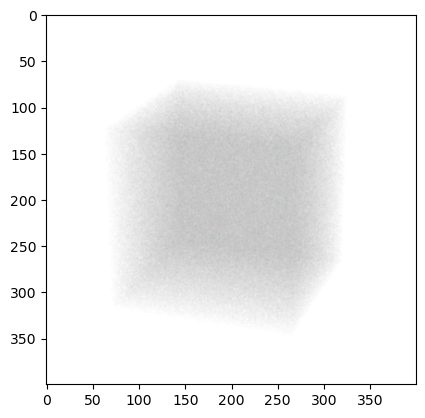

In [8]:
plt.imshow(img.reshape(400, 400, 3).data.cpu().numpy())

# Training